In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

calls = pd.read_csv('911.csv')
calls.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [6]:
# Top 5 Zip Codes For Emergency Calls
calls['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
# Top 5 Townships For Emergency Calls
calls['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
# Number of Unique Title Codes
calls['title'].nunique()

110

In [9]:
# Extract Reason from Title Code
calls['Reason'] = calls['title'].apply(lambda x: x.split(':')[0])
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [10]:
# Most Common Reasons
calls['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

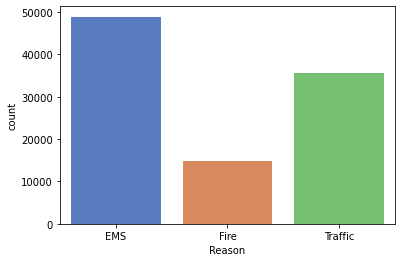

In [14]:
# Countplot of Reasons
sb.countplot(data=calls, x='Reason', palette='muted')

In [15]:
# Need to convert timeStamps to DateTime objects
calls['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(calls['timeStamp'].iloc[0]) # to confirm

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
calls['Hour'] = calls['timeStamp'].apply(lambda time: time.hour)
calls['Month'] = calls['timeStamp'].apply(lambda time: time.month)
calls['DayOfWeek'] = calls['timeStamp'].apply(lambda time: time.dayofweek)

In [18]:
calls.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


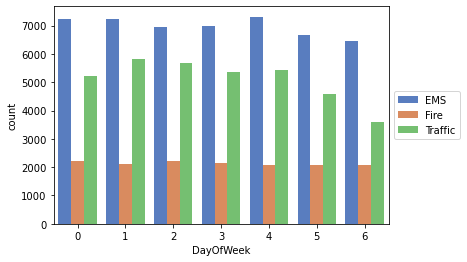

In [28]:
# Countplot for Day of Week. Hue Based on Reason
# Moved Legend to outside of plot for readability
sb.countplot(data=calls, x="DayOfWeek", hue="Reason", palette='muted').legend(loc='center left', bbox_to_anchor=(1, 0.5))

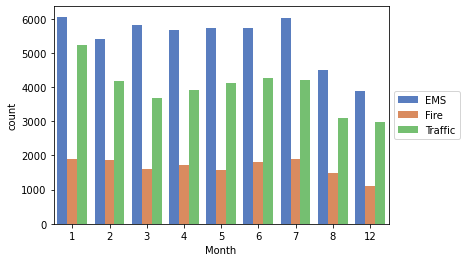

In [34]:
# Same thing for month
sb.countplot(data=calls, x="Month", hue="Reason", palette="muted").legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [37]:
callsByMonth = calls.groupby('Month').count()
callsByMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

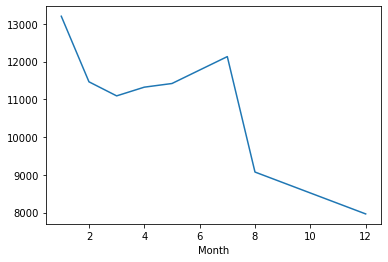

In [38]:
# Basic Calls By Month Plot
callsByMonth['twp'].plot()

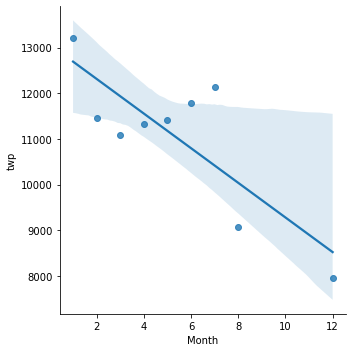

In [48]:
# Linear Fit on # of Calls per Month
sb.lmplot(data=callsByMonth.reset_index(), x='Month', y='twp')

<AxesSubplot:xlabel='Month', ylabel='twp'>

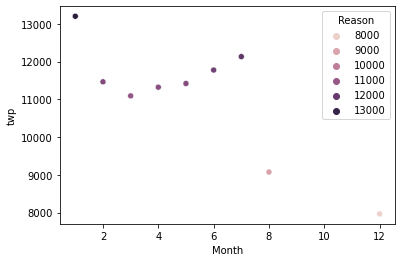

In [49]:
# Scatterplot
sb.scatterplot(data=callsByMonth, x="Month", y="twp")

In [50]:
# Create Date Column
calls['Date'] = calls['timeStamp'].apply(lambda time: time.date())
calls.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,2015-12-10


<AxesSubplot:xlabel='Date'>

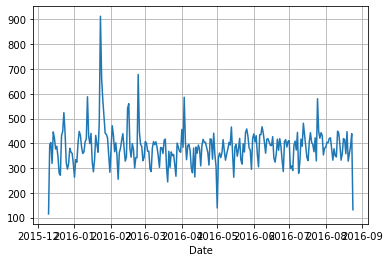

In [52]:
# Plot Number of Calls by Date
callsByDate = calls.groupby('Date').count()
callsByDate['twp'].plot(grid=True)

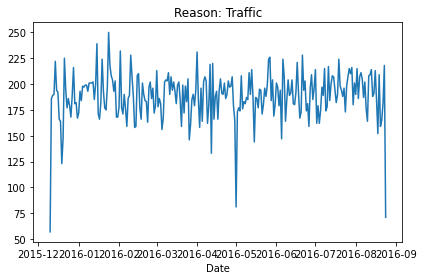

In [54]:
# Plot Number of EMS Calls by Date
calls[calls['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('Reason: EMS')
plt.tight_layout()

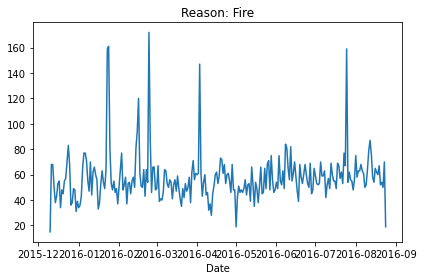

In [55]:
# Plot Number of Fire Calls by Date
calls[calls['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Reason: Fire')
plt.tight_layout()

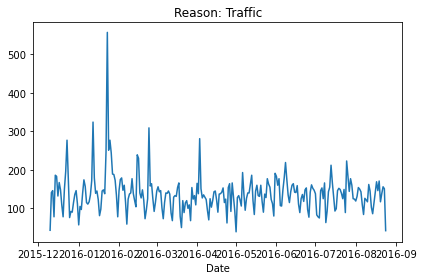

In [56]:
# Plot Number of Traffic Calls by Date
calls[calls['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Reason: Traffic')
plt.tight_layout()

In [58]:
# Restructure Data
callsByDayHour = calls.groupby(by=['DayOfWeek', 'Hour']).count()['Reason'].unstack()
callsByDayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


<AxesSubplot:xlabel='Hour', ylabel='DayOfWeek'>

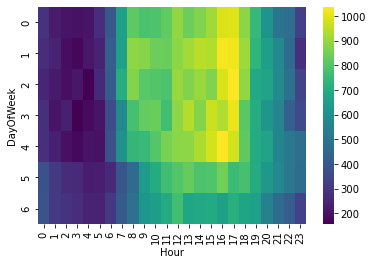

In [68]:
sb.heatmap(data=callsByDayHour, cmap="viridis")

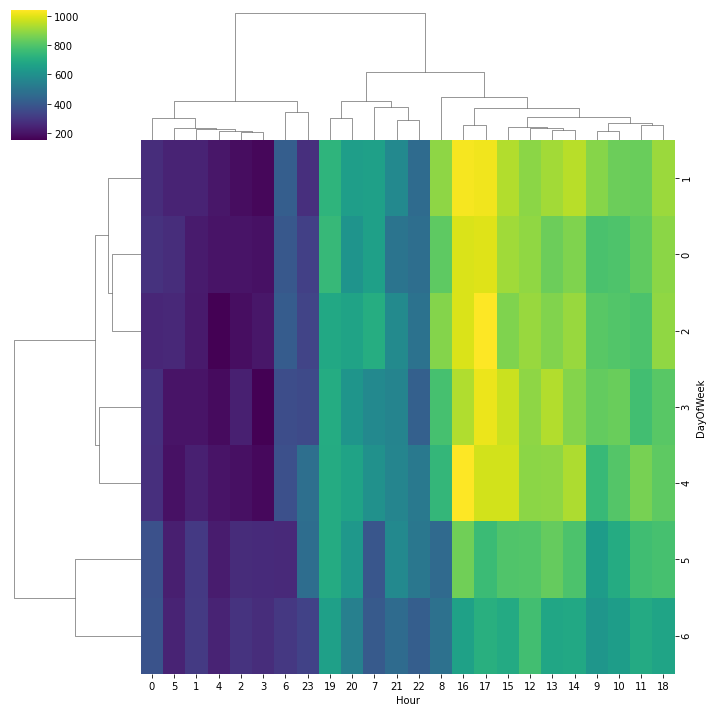

In [69]:
sb.clustermap(data=callsByDayHour, cmap="viridis")

In [70]:
# Calls by Day and Month
callsByDayMonth = calls.groupby(by=['DayOfWeek', 'Month']).count()['Reason'].unstack()
callsByDayMonth.head()

Month,1,2,3,4,5,6,7,8,12
DayOfWeek,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065


<AxesSubplot:xlabel='Month', ylabel='DayOfWeek'>

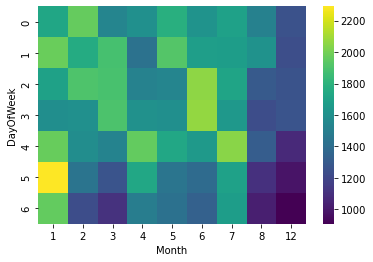

In [71]:
sb.heatmap(data=callsByDayMonth, cmap='viridis')

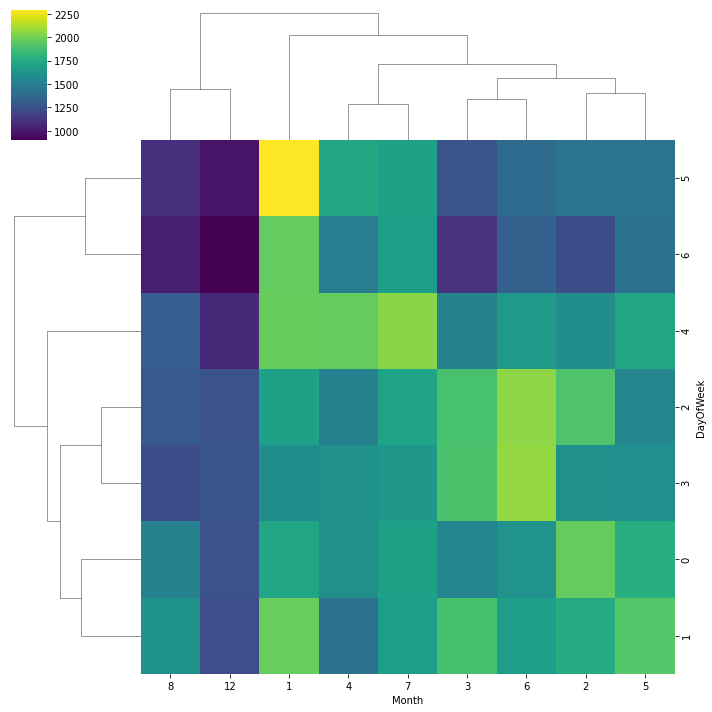

In [72]:
sb.clustermap(data=callsByDayMonth, cmap='viridis')